In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Load data

df_2019 = pd.read_csv('data/mini-lottowyniki 2019.csv', sep=';')
df_2020 = pd.read_csv('data/mini-lottowyniki 2020.csv', sep=';')
df_2021 = pd.read_csv('data/mini-lottowyniki 2021.csv', sep=';')
df_2022 = pd.read_csv('data/mini-lottowyniki 2022.csv', sep=';')

df = df_2019
df = df.append(df_2020, ignore_index=True)
df = df.append(df_2021, ignore_index=True)
df = df.append(df_2022, ignore_index=True)


In [17]:
#Mini lotto numbers are from 1 to 42 
# quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
# quantity = np.transpose(quantity)

In [18]:
#----------------------2019--------------------------
#Calculating quantity of numbers per column

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2019 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2019[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2019[column] = df_quantity[column]
    
print(df_all_quantity_2019.head(5))

   numbers    N1    N2   N3   N4   N5
0        1  39.0   0.0  0.0  0.0  0.0
1        2  36.0   2.0  0.0  0.0  0.0
2        3  32.0  10.0  1.0  0.0  0.0
3        4  46.0   6.0  0.0  0.0  0.0
4        5  38.0  19.0  4.0  0.0  0.0


In [19]:
#Adding column with sum for all numbers

df_all_quantity_2019['sum_all'] = df_all_quantity_2019['N1'] + df_all_quantity_2019['N2'] + df_all_quantity_2019['N3'] + df_all_quantity_2019['N4'] + df_all_quantity_2019['N5']

In [20]:
#Printing dataframe sorted by descending with sum_all

print(df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(10))

    numbers    N1    N2    N3    N4    N5  sum_all
4         5  38.0  19.0   4.0   0.0   0.0     61.0
27       28   0.0   5.0  22.0  17.0  13.0     57.0
21       22   4.0   8.0  31.0  10.0   3.0     56.0
36       37   0.0   0.0   4.0  21.0  30.0     55.0
3         4  46.0   6.0   0.0   0.0   0.0     52.0
31       32   0.0   0.0   9.0  24.0  19.0     52.0
34       35   0.0   0.0  10.0  18.0  24.0     52.0
15       16   7.0  23.0  17.0   4.0   0.0     51.0
22       23   5.0  13.0  16.0  10.0   5.0     49.0
28       29   0.0   1.0  12.0  28.0   8.0     49.0


In [21]:
#Visualisation

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2019)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2019")

In [22]:
#----------------------2020--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2020 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2020[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2020[column] = df_quantity[column]
    
df_all_quantity_2020['sum_all'] = df_all_quantity_2020['N1'] + df_all_quantity_2020['N2'] + df_all_quantity_2020['N3'] + df_all_quantity_2020['N4'] + df_all_quantity_2020['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2020)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2020")

In [23]:
#----------------------2021--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2021 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2021[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2021[column] = df_quantity[column]
    
df_all_quantity_2021['sum_all'] = df_all_quantity_2021['N1'] + df_all_quantity_2021['N2'] + df_all_quantity_2021['N3'] + df_all_quantity_2021['N4'] + df_all_quantity_2021['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2021)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2021")

In [24]:
#----------------------2022--------------------------

available_numbers = np.arange(1,43,1)
columns = ['N1', 'N2', 'N3', 'N4', 'N5']

df_all_quantity_2022 = pd.DataFrame(available_numbers, columns = ['numbers'])

for column in columns:
    quantity = np.array([np.arange(1,43,1, dtype=int), np.zeros(len(np.arange(1,43,1)))])
    quantity = np.transpose(quantity)
    for i in df_2022[column]:
        for number in available_numbers:
            if i == number:
                quantity[number-1][1] = quantity[number-1][1] + 1 
    df_quantity = pd.DataFrame(quantity, columns = ['numbers', column])  
    df_all_quantity_2022[column] = df_quantity[column]
    
df_all_quantity_2022['sum_all'] = df_all_quantity_2022['N1'] + df_all_quantity_2022['N2'] + df_all_quantity_2022['N3'] + df_all_quantity_2022['N4'] + df_all_quantity_2022['N5']

# plt.figure(figsize=(14, 6))
# sns.set_style("darkgrid")
# sns.set(font="Verdana")
# ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2022)
# sns.color_palette()
# plt.ylabel("Quantity")
# plt.xlabel("Numbers")
# plt.title("Quantity of numbers in 2022")

Text(0.5, 1.0, 'Quantity of numbers in 2022')

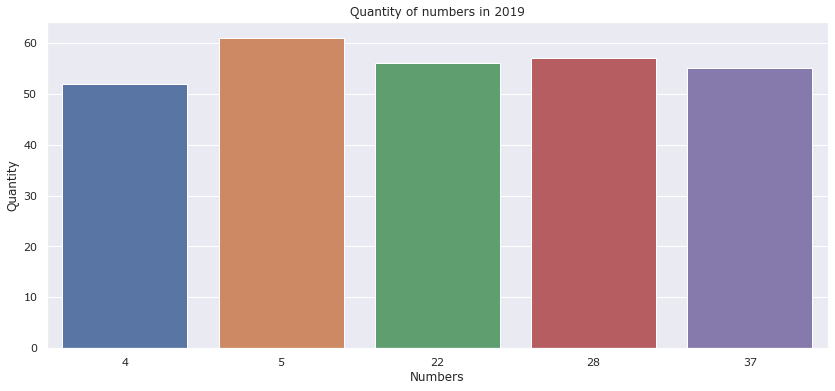

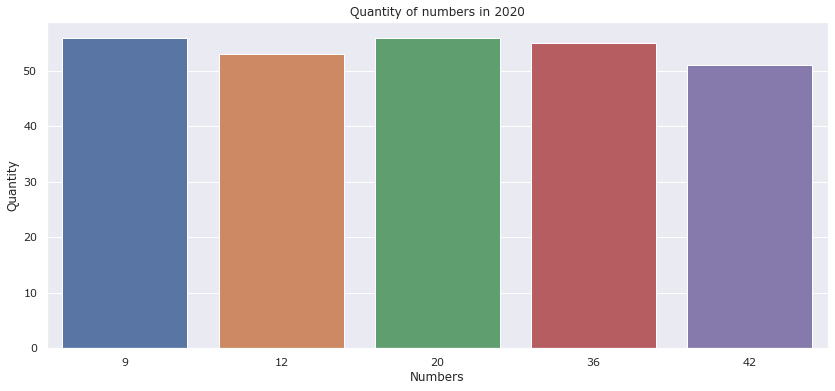

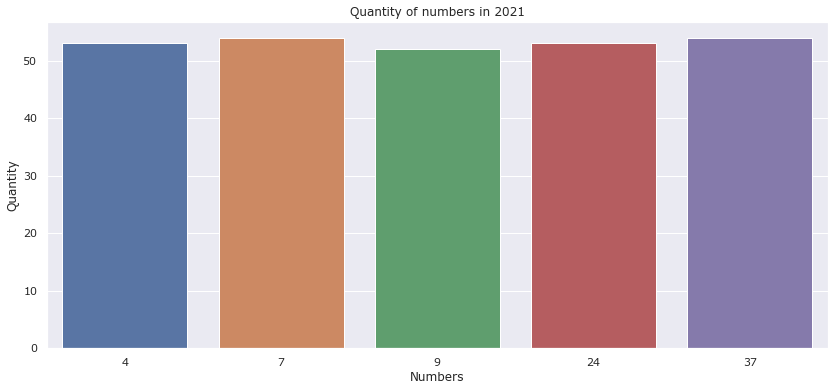

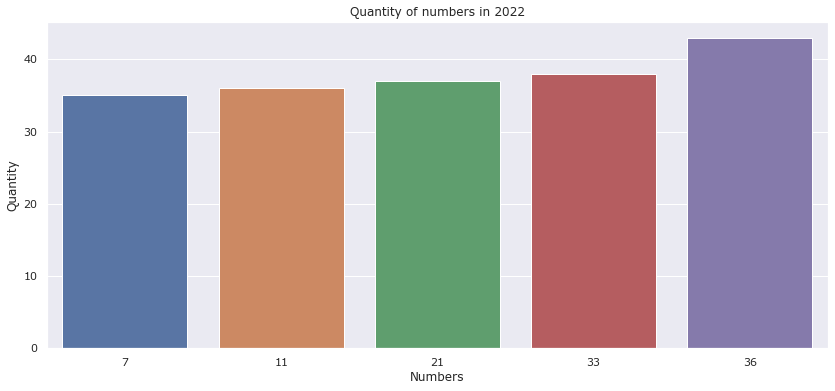

In [39]:
#----------------------Visualisation--------------------------
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2019")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2020.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2020")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2021.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2021")

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=df_all_quantity_2022.sort_values(by=['sum_all'], ascending=False).head(5))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Quantity of numbers in 2022")

In [34]:
#Compare the results
print('-------------2019--------------')
print(df_all_quantity_2019.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2020--------------')
print(df_all_quantity_2020.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2021-------------')
print(df_all_quantity_2021.sort_values(by=['sum_all'], ascending=False).head(5))
print('-------------2022--------------')
print(df_all_quantity_2022.sort_values(by=['sum_all'], ascending=False).head(5))

-------------2019--------------
    numbers    N1    N2    N3    N4    N5  sum_all
4         5  38.0  19.0   4.0   0.0   0.0     61.0
27       28   0.0   5.0  22.0  17.0  13.0     57.0
21       22   4.0   8.0  31.0  10.0   3.0     56.0
36       37   0.0   0.0   4.0  21.0  30.0     55.0
3         4  46.0   6.0   0.0   0.0   0.0     52.0
-------------2020--------------
    numbers    N1    N2    N3    N4    N5  sum_all
8         9  14.0  27.0  13.0   2.0   0.0     56.0
19       20   3.0  17.0  18.0  15.0   3.0     56.0
35       36   0.0   1.0   1.0  28.0  25.0     55.0
11       12  13.0  22.0  16.0   2.0   0.0     53.0
41       42   0.0   0.0   0.0   0.0  51.0     51.0
-------------2021-------------
    numbers    N1    N2    N3    N4    N5  sum_all
36       37   0.0   1.0   3.0  16.0  34.0     54.0
6         7  35.0  12.0   7.0   0.0   0.0     54.0
3         4  40.0  12.0   1.0   0.0   0.0     53.0
23       24   1.0  11.0  17.0  19.0   5.0     53.0
8         9  29.0  17.0   3.0   3.0   

    numbers     N1    N2    N3    N4     N5  sum_all
35       36    0.0   1.0  16.0  83.0   88.0    188.0
21       22    4.0  36.0  85.0  43.0   12.0    180.0
11       12   47.0  84.0  42.0   5.0    0.0    178.0
3         4  135.0  40.0   3.0   0.0    0.0    178.0
36       37    0.0   1.0   8.0  59.0  108.0    176.0
32       33    1.0   8.0  34.0  61.0   66.0    170.0
13       14   29.0  71.0  53.0  14.0    0.0    167.0
41       42    0.0   0.0   0.0   0.0  167.0    167.0
6         7  106.0  49.0  12.0   0.0    0.0    167.0
34       35    0.0   1.0  23.0  67.0   75.0    166.0


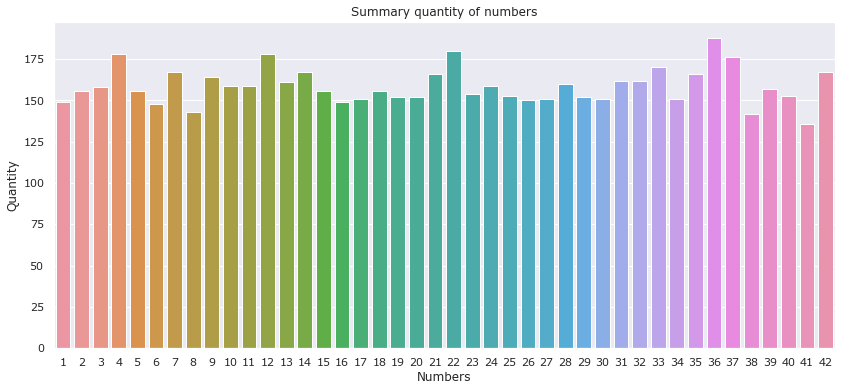

In [57]:
#Four years summary

summary_quantity = pd.DataFrame(available_numbers, columns = ['numbers'])
summary_quantity['N1'] = df_all_quantity_2019['N1'] + df_all_quantity_2020['N1'] + df_all_quantity_2021['N1'] + df_all_quantity_2022['N1']
summary_quantity['N2'] = df_all_quantity_2019['N2'] + df_all_quantity_2020['N2'] + df_all_quantity_2021['N2'] + df_all_quantity_2022['N2']
summary_quantity['N3'] = df_all_quantity_2019['N3'] + df_all_quantity_2020['N3'] + df_all_quantity_2021['N3'] + df_all_quantity_2022['N3']
summary_quantity['N4'] = df_all_quantity_2019['N4'] + df_all_quantity_2020['N4'] + df_all_quantity_2021['N4'] + df_all_quantity_2022['N4']
summary_quantity['N5'] = df_all_quantity_2019['N5'] + df_all_quantity_2020['N5'] + df_all_quantity_2021['N5'] + df_all_quantity_2022['N5']

summary_quantity['sum_all'] = summary_quantity['N1'] + summary_quantity['N2'] + summary_quantity['N3'] + summary_quantity['N4'] + summary_quantity['N5']

plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
sns.set(font="Verdana")
ax = sns.barplot(x='numbers', y="sum_all", data=summary_quantity.sort_values(by=['sum_all'], ascending=False))
sns.color_palette()
plt.ylabel("Quantity")
plt.xlabel("Numbers")
plt.title("Summary quantity of numbers")

print(summary_quantity.sort_values(by=['sum_all'], ascending=False).head(10))

In [85]:
#----------------------Pair Analysis--------------------------

a_collection = np.arange(1,43,1)
b_collection = np.arange(1,43,1)


#Create list with all pairs
pairs = []
for a in a_collection:
    for b in b_collection: 
        pairs.append([a,b])

In [86]:
#Pairs without duplicates and doubbles

#Delate dubbles
new_pairs = []
for pair in pairs:
    if pair[0] != pair[1]:
        new_pairs.append(pair)
        
pairs = new_pairs

#Delate duplicates
for pair in pairs:
    pair.sort()
    
pairs.sort()

new_pairs = []

for i in range(len(pairs)):
    if i % 2 == 0:
        new_pairs.append(pairs[i])

pairs = new_pairs 

In [99]:
#Checking if pair in mini lotto results
found_pairs = []

for pair in pairs: 
    for index, rows in df.iterrows():
        numbers_list = [rows.N1, rows.N2, rows.N3, rows.N4, rows.N5]
        if pair[0] in numbers_list and pair[1] in numbers_list:
            found_pairs.append(pair)
        


In [100]:
#Counting the occurrence of pairs
quantity_of_pairs = []

for pair in pairs:
    count = 0
    for f_pair in found_pairs:
        if pair is f_pair:
            count += 1
    quantity_of_pairs.append([pair,count])



In [101]:
quantity_of_pairs_df = pd.DataFrame(quantity_of_pairs, columns=['pair','quantity'])

In [102]:
#List of the most common pairs
print(quantity_of_pairs_df.sort_values(by=['quantity'], ascending=False).head(30))

         pair  quantity
584  [18, 42]        28
845  [36, 42]        26
515  [16, 22]        26
130   [4, 15]        25
166   [5, 14]        25
461  [14, 21]        25
256   [7, 33]        25
224   [6, 36]        25
154   [4, 39]        25
151   [4, 36]        25
389  [11, 36]        25
443  [13, 31]        24
41     [2, 3]        24
540  [17, 22]        24
507  [15, 40]        24
645  [21, 37]        24
449  [13, 37]        24
74    [2, 36]        24
97    [3, 20]        24
243   [7, 20]        24
137   [4, 22]        24
824  [33, 42]        24
236   [7, 13]        24
614  [20, 27]        24
386  [11, 33]        24
474  [14, 34]        23
475  [14, 35]        23
129   [4, 14]        23
462  [14, 22]        23
348  [10, 26]        23


In [112]:
#----------------------Tripples Analysis--------------------------

a_collection = np.arange(1,43,1)
b_collection = np.arange(1,43,1)
c_collection = np.arange(1,43,1)


#Create list with all pairs
pairs = []
for a in a_collection:
    for b in b_collection: 
        for c in c_collection:
            pairs.append([a,b,c])
   

In [115]:
#Delate tripples
new_pairs = []
for pair in pairs:
    if pair[0] != pair[1] and pair[1] != pair[2] and pair[0] != pair[2]:
        new_pairs.append(pair)
        
pairs = new_pairs
    
print(pairs)

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 4], [1, 2, 4], [1, 2, 4], [1, 2, 4], [1, 2, 4], [1, 2, 4], [1, 2, 5], [1, 2, 5], [1, 2, 5], [1, 2, 5], [1, 2, 5], [1, 2, 5], [1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 6], [1, 2, 7], [1, 2, 7], [1, 2, 7], [1, 2, 7], [1, 2, 7], [1, 2, 7], [1, 2, 8], [1, 2, 8], [1, 2, 8], [1, 2, 8], [1, 2, 8], [1, 2, 8], [1, 2, 9], [1, 2, 9], [1, 2, 9], [1, 2, 9], [1, 2, 9], [1, 2, 9], [1, 2, 10], [1, 2, 10], [1, 2, 10], [1, 2, 10], [1, 2, 10], [1, 2, 10], [1, 2, 11], [1, 2, 11], [1, 2, 11], [1, 2, 11], [1, 2, 11], [1, 2, 11], [1, 2, 12], [1, 2, 12], [1, 2, 12], [1, 2, 12], [1, 2, 12], [1, 2, 12], [1, 2, 13], [1, 2, 13], [1, 2, 13], [1, 2, 13], [1, 2, 13], [1, 2, 13], [1, 2, 14], [1, 2, 14], [1, 2, 14], [1, 2, 14], [1, 2, 14], [1, 2, 14], [1, 2, 15], [1, 2, 15], [1, 2, 15], [1, 2, 15], [1, 2, 15], [1, 2, 15], [1, 2, 16], [1, 2, 16], [1, 2, 16], [1, 2, 16], [1, 2, 16], [1, 2, 16], [1, 2, 17], [1, 2, 17], [1, 2, 17

In [122]:
#Delate duplicates
for pair in pairs:
    pair.sort()
    
pairs.sort()

unic_pairs_numbers = np.arange(0,68880,6)
new_pairs = []
for number in unic_pairs_numbers:
    new_pairs.append(pairs[number])
    
pairs = new_pairs

In [125]:
#Checking if tripple in mini lotto results
found_pairs = []

for pair in pairs: 
    for index, rows in df.iterrows():
        numbers_list = [rows.N1, rows.N2, rows.N3, rows.N4, rows.N5]
        if pair[0] in numbers_list and pair[1] in numbers_list and pair[2] in numbers_list:
            found_pairs.append(pair)

            

In [130]:
#Counting the occurrence of tripples
quantity_of_pairs = []

for pair in pairs:
    count = 0
    for f_pair in found_pairs:
        if pair is f_pair:
            count += 1
    quantity_of_pairs.append([pair,count])

In [131]:
quantity_of_pairs_df = pd.DataFrame(quantity_of_pairs, columns=['pair','quantity'])

In [132]:
#List of the most common tripples
print(quantity_of_pairs_df.sort_values(by=['quantity'], ascending=False).head(30))

               pair  quantity
2163    [3, 23, 36]         6
7769   [13, 31, 41]         6
7336   [12, 29, 37]         6
11395  [33, 41, 42]         6
2987    [4, 31, 41]         6
7775   [13, 32, 37]         6
4324    [6, 36, 42]         6
1097    [2, 10, 36]         6
707     [1, 27, 35]         5
6389   [10, 26, 32]         5
2646    [4, 14, 23]         5
6930   [11, 32, 33]         5
7924   [14, 18, 39]         5
3324    [5, 14, 35]         5
818     [1, 40, 42]         5
4964     [8, 9, 39]         5
9879   [20, 31, 37]         5
8203   [14, 41, 42]         5
8455   [15, 28, 34]         5
4102    [6, 20, 36]         5
7990   [14, 21, 39]         5
890      [2, 4, 36]         5
4505    [7, 13, 19]         5
7179   [12, 20, 33]         5
2644    [4, 14, 21]         5
828      [2, 3, 12]         5
8376   [15, 23, 35]         5
7547   [13, 18, 40]         5
4709    [7, 21, 27]         5
3766     [6, 8, 30]         5
